 # UN DATA ANALYSIS 

Analysis on UN Data comparing gdp per capita and intrnet usage

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Formatting 

In [2]:
%matplotlib inline

### Load Data 

In [3]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv',nrows=6729)

In [4]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)


In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [7]:
internet_df.shape

(4495, 4)

In [8]:
gdp_df.shape

(6729, 4)

In [9]:
#### Internet_df has 4,495 rows and 4 columns and GDP_df has 6,731 rows and 4 columns 

In [10]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [11]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [13]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [14]:
gdp_df.pop('Value Footnotes')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6724   NaN
6725   NaN
6726   NaN
6727   NaN
6728   NaN
Name: Value Footnotes, Length: 6729, dtype: float64

In [15]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
dtype: object

In [16]:
internet_df.pop('Value Footnotes')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4490   NaN
4491   NaN
4492   NaN
4493   NaN
4494   NaN
Name: Value Footnotes, Length: 4495, dtype: float64

In [17]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
dtype: object

In [18]:
internet_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [19]:
internet_df=internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'})

In [20]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [21]:
internet_df['Year'].astype(object)

0       2014
1       2013
2       2012
3       2011
4       2010
        ... 
4490    1997
4491    1996
4492    1995
4493    1994
4494    1990
Name: Year, Length: 4495, dtype: object

In [22]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df,on=['Country','Year'],how='outer')

In [23]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [24]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [25]:
subset_gdp_int=gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004,2009,2014])]

In [26]:
subset_gdp_int.head(2)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.39
9,Afghanistan,2009,1502.354073,3.55


In [27]:
ni_gdp_int1=gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2004]
ni_gdp_int2=gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2009]
ni_gdp_int3=gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]

In [28]:
print(ni_gdp_int1.head(5))

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
14           Afghanistan  2004     1025.208245            0.105809
31               Albania  2004     7001.054082            2.420388
60               Algeria  2004    11845.170512            4.634475
89                Angola  2004     4604.657044            0.464815
118  Antigua and Barbuda  2004    21161.123532           24.266544


In [29]:
print(ni_gdp_int2)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
9               Afghanistan  2009     1502.354073             3.55000
26                  Albania  2009     9525.377979            41.20000
55                  Algeria  2009    12697.690780            11.23000
84                   Angola  2009     6292.534856             6.00000
113     Antigua and Barbuda  2009    22568.626530            42.00000
...                     ...   ...             ...                 ...
7546              Swaziland  2009             NaN             8.94000
7567                  Syria  2009             NaN            17.30000
7610     T.F.Y.R. Macedonia  2009             NaN            51.77000
7668               Viet Nam  2009             NaN            26.55000
7688  Virgin Islands (U.S.)  2009             NaN            27.39651

[279 rows x 4 columns]


In [30]:
print(ni_gdp_int3.head(10))

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
4            Afghanistan  2014     1795.735834                6.39
21               Albania  2014    10700.993216               60.10
50               Algeria  2014    13557.769757               18.09
79                Angola  2014     6813.052106               21.26
108  Antigua and Barbuda  2014    20440.540555               64.00
137           Arab World  2014    15286.726815                 NaN
166            Argentina  2014    18935.002497               64.70
195              Armenia  2014     7954.195331               46.30
223                Aruba  2014    36172.933355               83.78
252            Australia  2014    43651.103133               84.56


In [31]:
##2014 Max
ni_gdp_int3.loc[ni_gdp_int3['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2014
GDP_Per_Capita        42774.9
Internet_Users_Pct      98.16
Name: 2581, dtype: object

In [32]:
##2014 Min
ni_gdp_int3.loc[ni_gdp_int3['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6940, dtype: object

In [33]:
##2004 Max
ni_gdp_int1.loc[ni_gdp_int1['Internet_Users_Pct'].idxmax()]

Country                Sweden
Year                     2004
GDP_Per_Capita        40177.9
Internet_Users_Pct      83.89
Name: 5852, dtype: object

In [34]:
##2004 Min
ni_gdp_int1.loc[ni_gdp_int1['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6949, dtype: object

In [35]:
##2009 Max
ni_gdp_int2.loc[ni_gdp_int2['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2009
GDP_Per_Capita        41505.1
Internet_Users_Pct         93
Name: 2586, dtype: object

In [36]:
##2009 Min
ni_gdp_int2.loc[ni_gdp_int2['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6944, dtype: object

In [37]:
##2014 Highest GDP
ni_gdp_int3.loc[ni_gdp_int3['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita                  130439
Internet_Users_Pct                 NaN
Name: 3639, dtype: object

In [38]:
##2014 Lowest GDP
ni_gdp_int3.loc[ni_gdp_int3['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                         672.682
Internet_Users_Pct                         NaN
Name: 1014, dtype: object

In [39]:
## 2004 Internet Mean
int2004_m = ni_gdp_int1.loc[:,"Internet_Users_Pct"].mean()

In [40]:
## 2004 GDP Mean
gdp2004_m =ni_gdp_int1.loc[:,"GDP_Per_Capita"].mean()

#### plt.scatter(df.xcolumn, df.ycolumn)

Text(0, 0.5, 'GDP Per Capita')

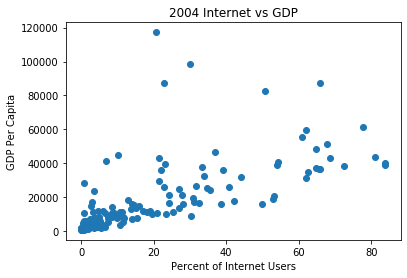

In [41]:
plt.scatter(ni_gdp_int1['Internet_Users_Pct'],
                    ni_gdp_int1['GDP_Per_Capita'])
plt.title('2004 Internet vs GDP')
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

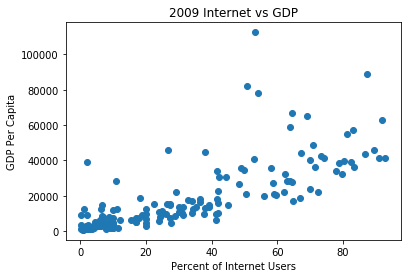

In [42]:
plt.scatter(ni_gdp_int2['Internet_Users_Pct'],
                    ni_gdp_int2['GDP_Per_Capita'])
plt.title('2009 Internet vs GDP')
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

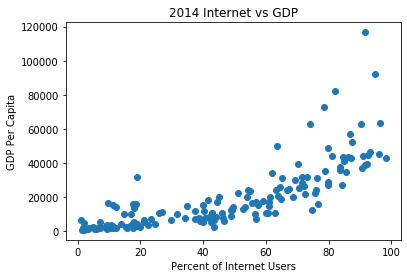

In [43]:
plt.scatter(ni_gdp_int3['Internet_Users_Pct'],
                    ni_gdp_int3['GDP_Per_Capita'])
plt.title('2014 Internet vs GDP')
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP Per Capita')

#### (#24) It seems that the Percent of Internet Users increased from 2004-2009 due to the fact that the plots are trending more towards the right 

#### (#25) GDP Unimodal?

#### (#26) Internet Unimodal?

In [44]:
ni_gdp_int3.nlargest(5,'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


In [45]:
top_5_internet=subset_gdp_int.loc[subset_gdp_int['Country'].isin(['Iceland','Bermuda'
                                                'Norway','Denmark','Andorra'])]

In [46]:
top_5_internet.nlargest(15,'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.160000
1404,Denmark,2014,45057.083449,95.990000
6732,Andorra,2014,NaN,95.900000
2586,Iceland,2009,41505.084834,93.000000
1409,Denmark,2009,43382.615688,86.840000
2591,Iceland,2004,38893.378798,83.880000
1414,Denmark,2004,43670.446201,80.930000
6737,Andorra,2009,NaN,78.530000
6742,Andorra,2004,NaN,26.837954


AttributeError: module 'seaborn' has no attribute 'histplot'

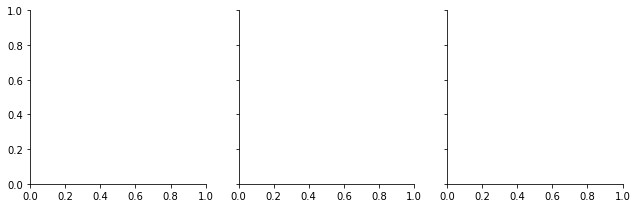

In [98]:
tp_int_gdp=sns.FacetGrid(top_5_internet,col= 'Country')
tp_int_gdp.map(sns.histplot, "Internet_Users_Pct")
